<a href="https://colab.research.google.com/github/Cumbercookie/Obstacle-detection-and-navigation-robot/blob/main/ObstacleIdentifierRobot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Mon Nov  6 17:57:53 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.2/645.2 kB 10.1 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo checks

Ultralytics YOLOv8.0.207 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.2/78.2 GB disk)

OS                  Linux-5.15.120+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 12.68 GB
CPU                 Intel Xeon 2.30GHz
CUDA                11.8

matplotlib          ✅ 3.7.1>=3.3.0
numpy               ✅ 1.23.5>=1.22.2
opencv-python       ✅ 4.8.0.76>=4.6.0
pillow              ✅ 9.4.0>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.11.3>=1.4.1
torch               ✅ 2.1.0+cu118>=1.8.0
torchvision         ✅ 0.16.0+cu118>=0.9.0
tqdm                ✅ 4.66.1>=4.64.0
pandas              ✅ 1.5.3>=1.1.4
seaborn             ✅ 0.12.2>=0.11.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0
thop                ✅ 0.1.1-2209072238>=0.1.1


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="tTV9T53wMglB8nTZaasM")
project = rf.workspace("college-xyupx").project("stairs-3at2t")
dataset = project.version(1).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.207, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to stairs-1 in yolov8:: 100%|██████████| 212/212 [00:00<00:00, 5050.16it/s]


In [ ]:
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=20 imgsz=640

Ultralytics YOLOv8.0.207 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/stairs-1/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, op

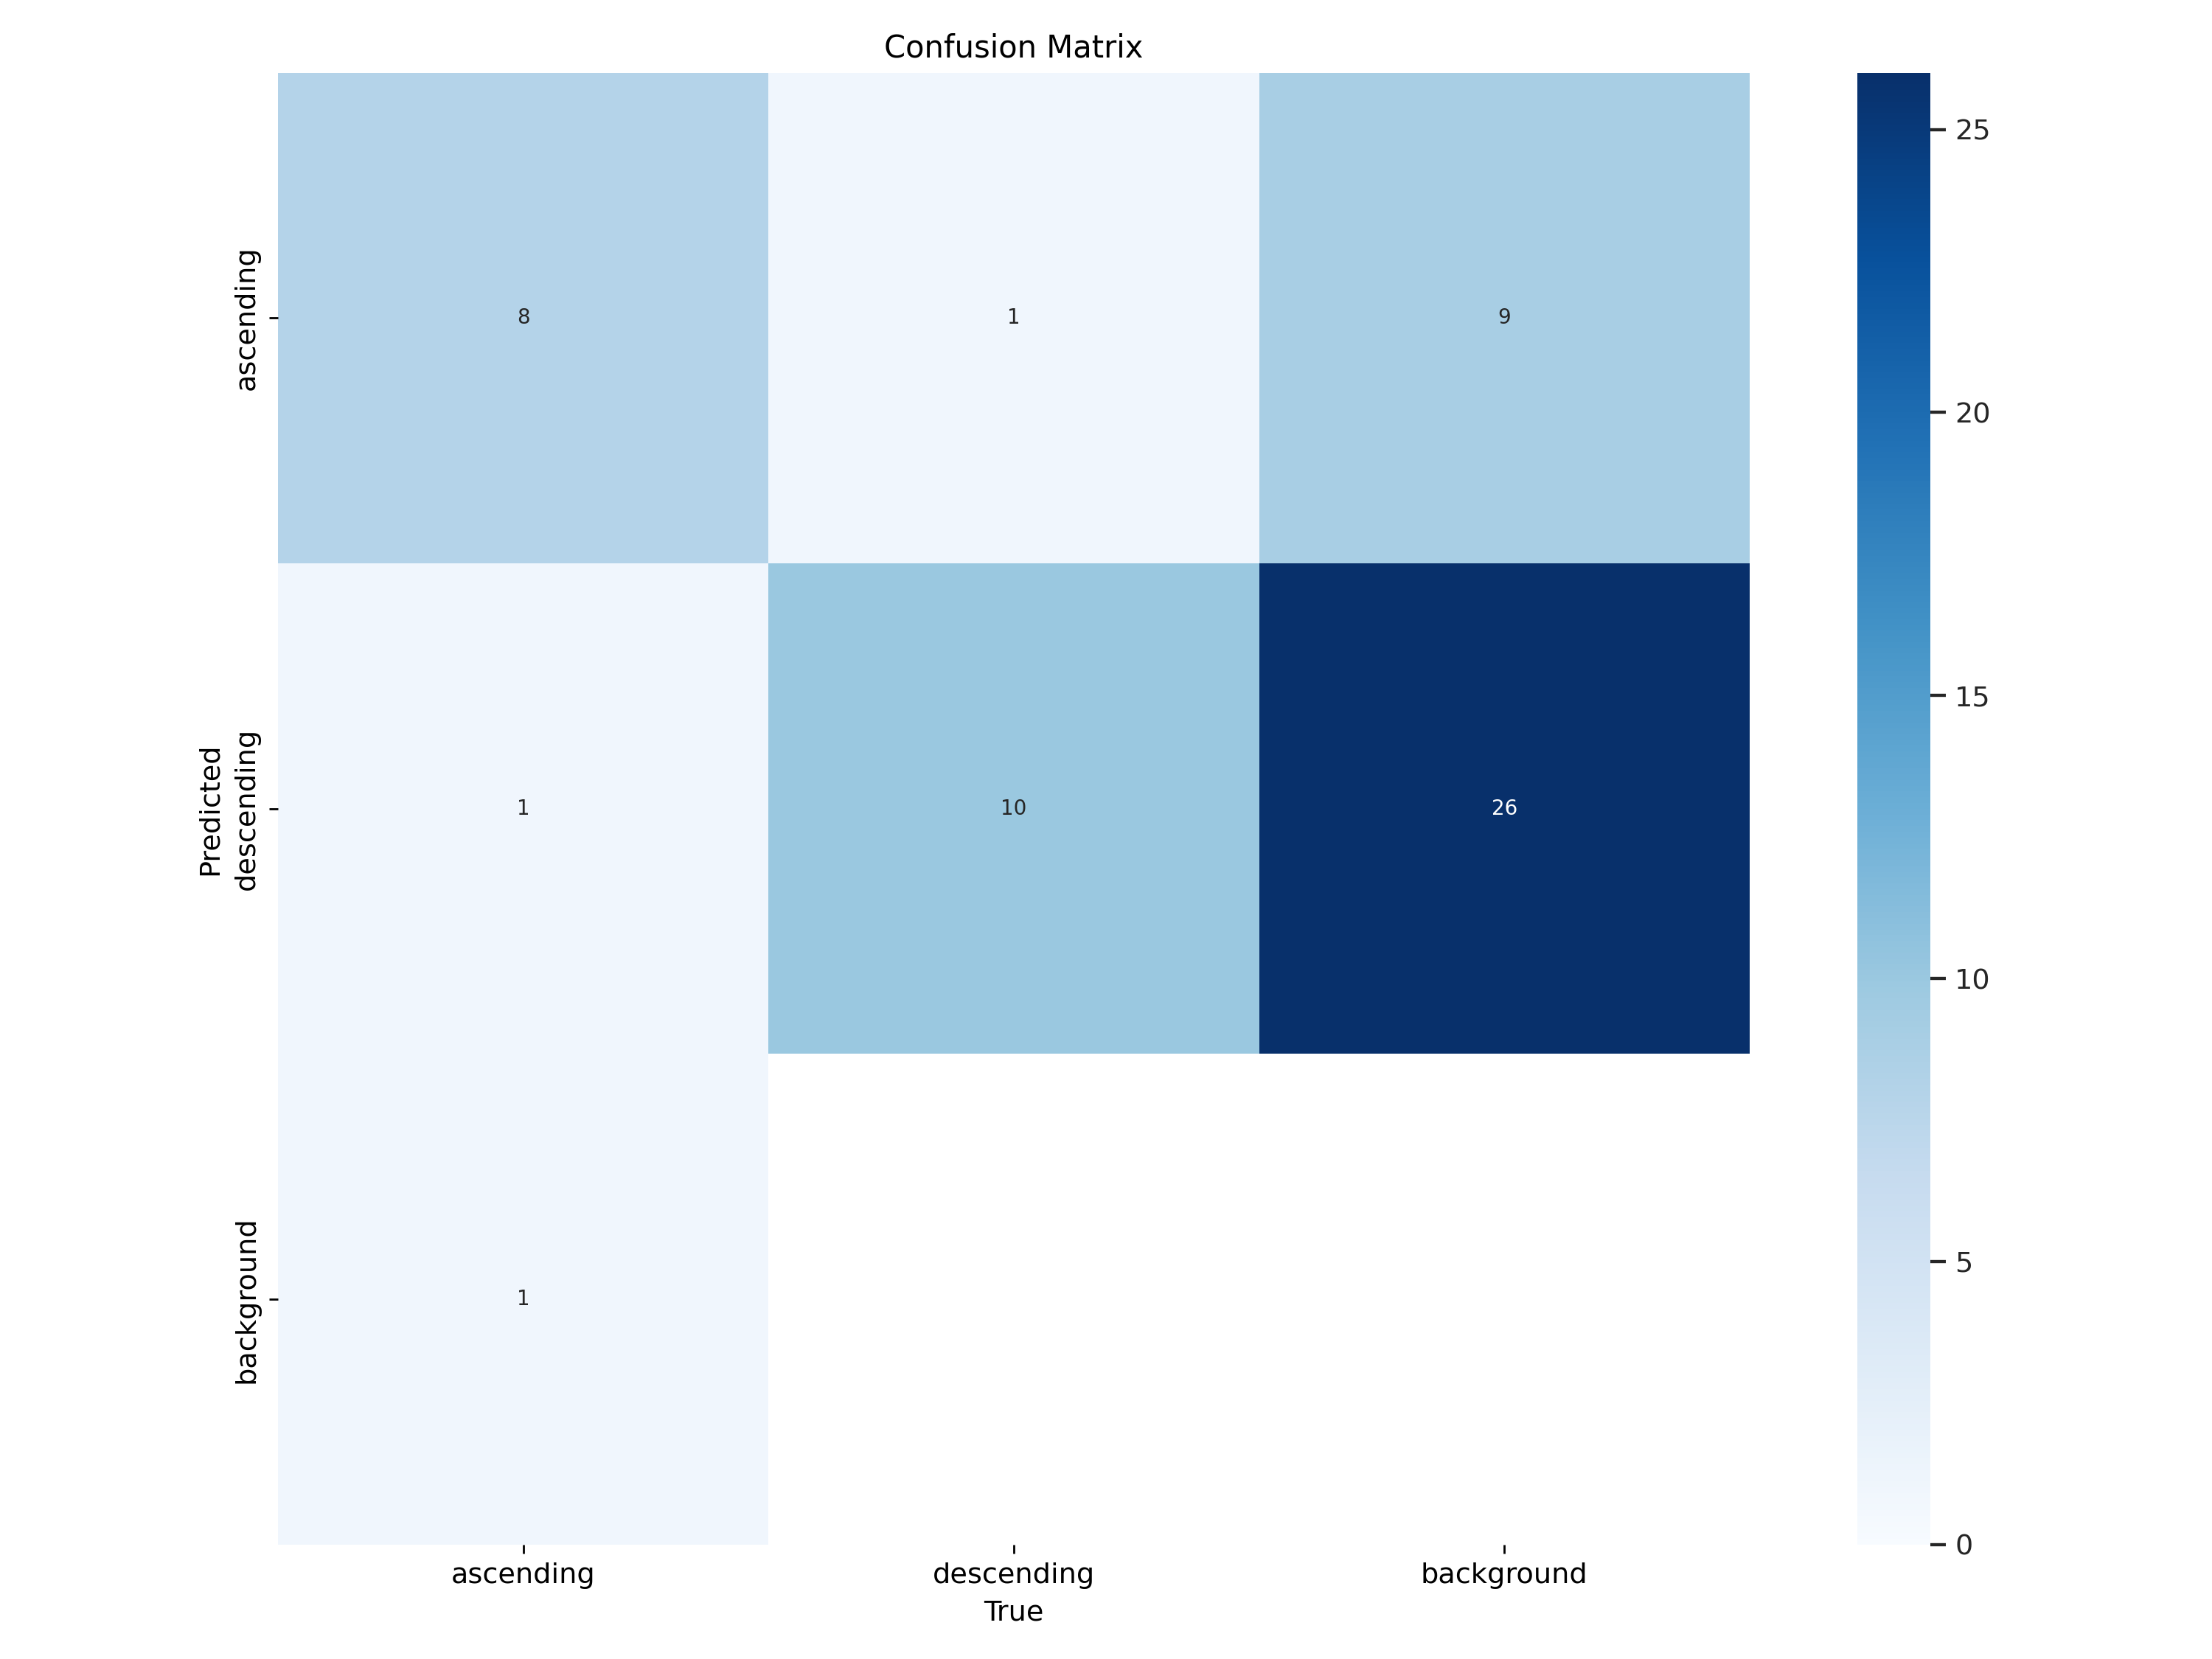

In [ ]:
Image(filename=f'/content/runs/detect/train4/confusion_matrix.png', width=600)

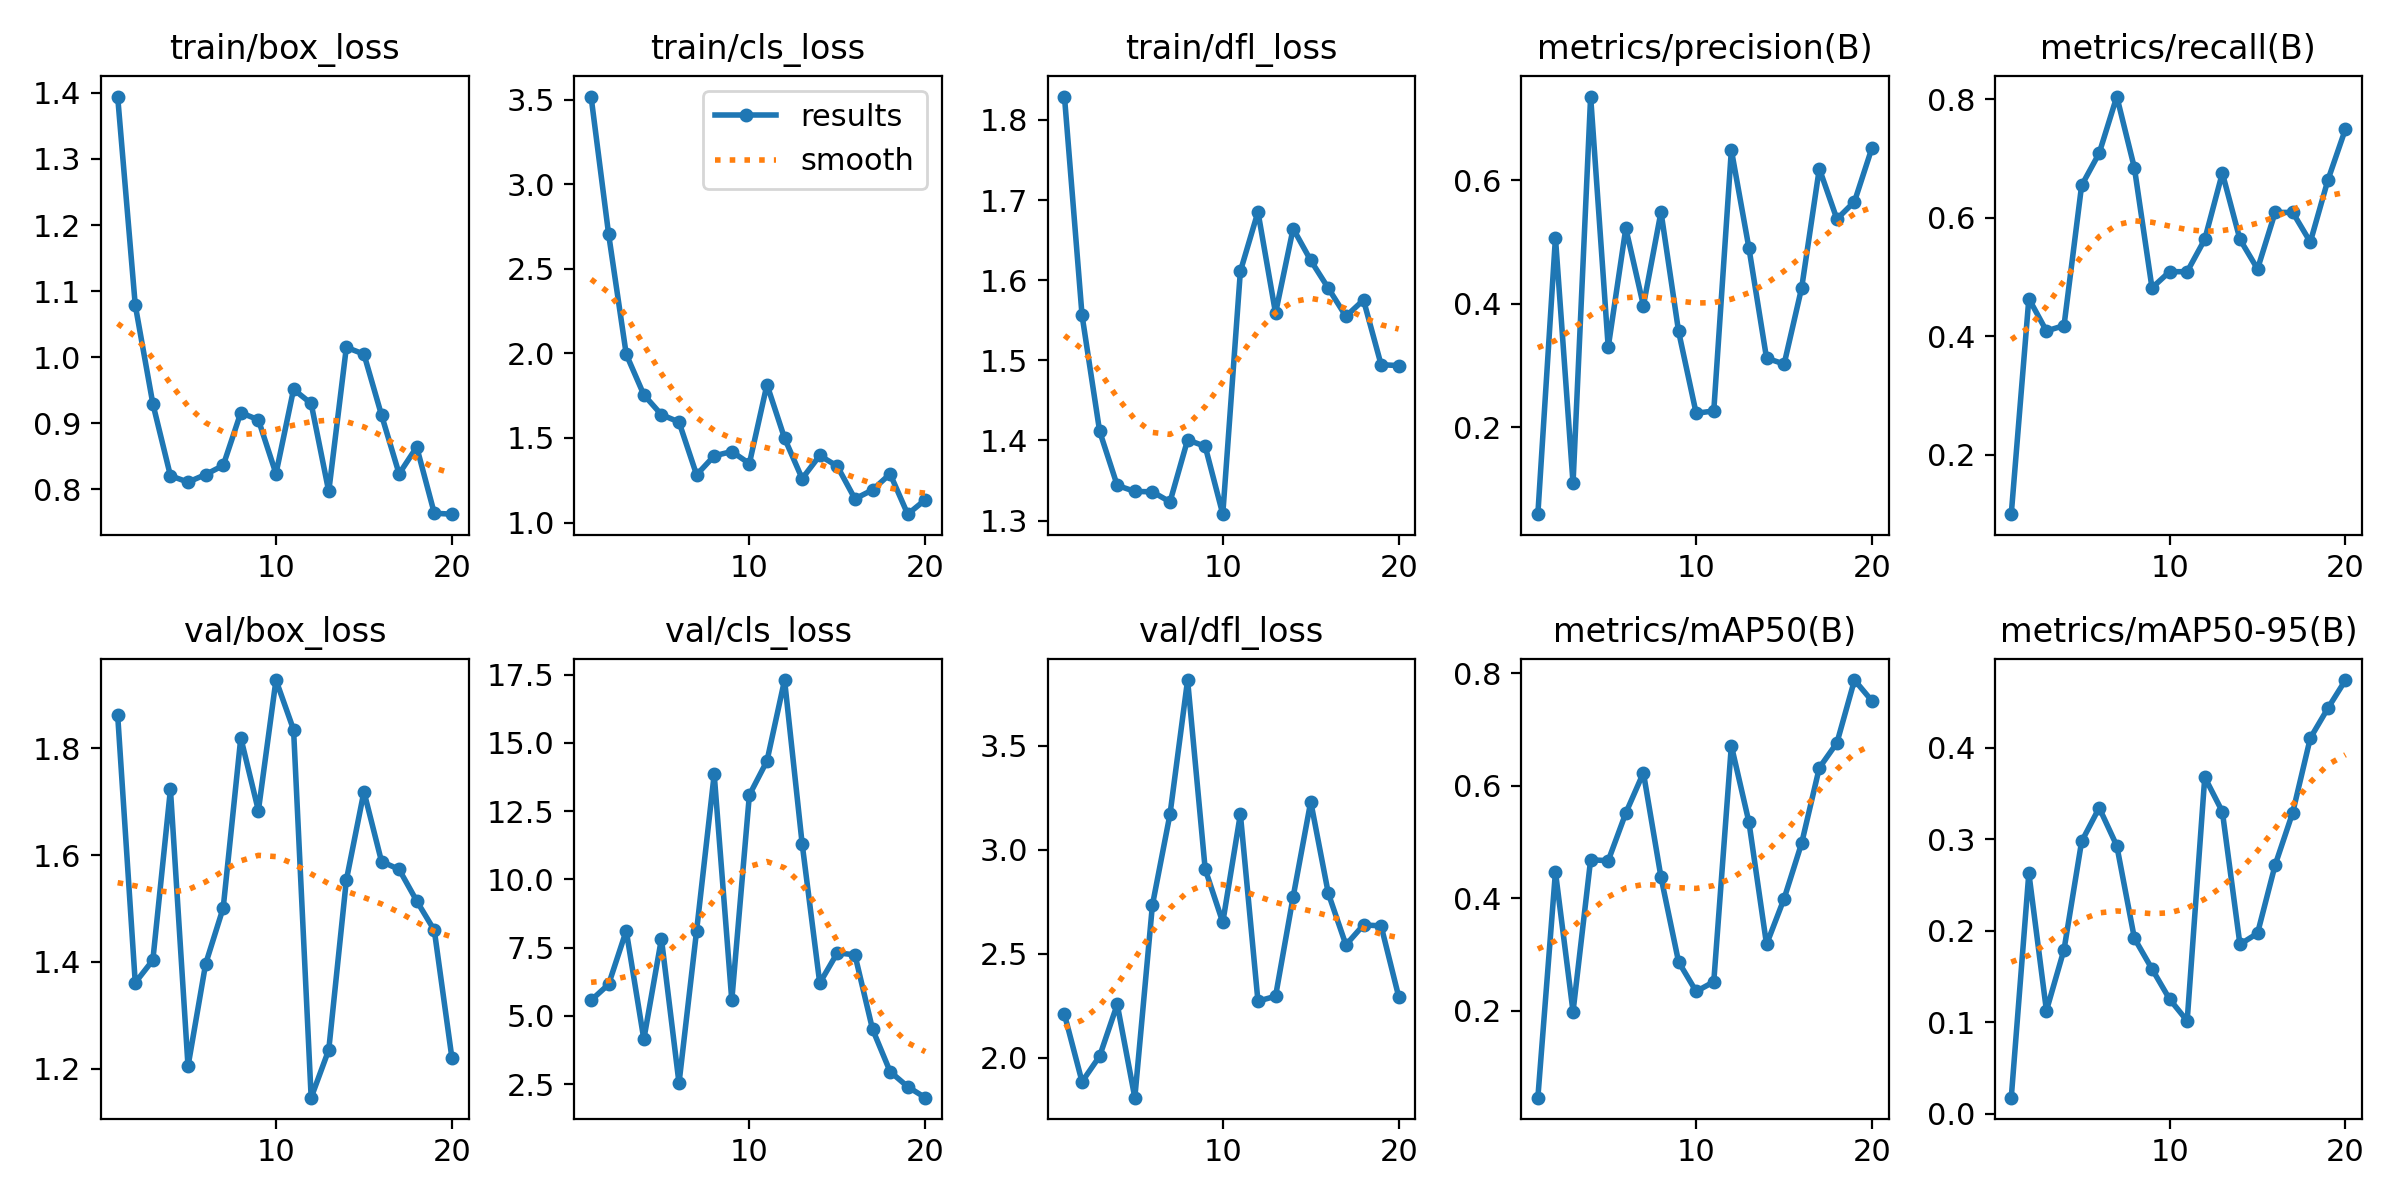

In [ ]:
Image(filename=f'/content/runs/detect/train4/results.png', width=600)

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train4/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.207 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/stairs-1/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100% 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:00<00:00,  2.08it/s]
                   all         20         21      0.674      0.743      0.766      0.481
             ascending         20         10      0.791       0.76      0.793      0.516
            descending         20         11      0.556      0.727       0.74      0.447
Speed: 0.2ms preprocess, 33.7ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train4/weights/best.pt source={dataset.location}/test/images

Ultralytics YOLOv8.0.207 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs

image 1/10 /content/stairs-1/test/images/1-13-_jpg.rf.816b613b9be02bedf6e74907ac8f4cf3.jpg: 640x640 2 ascendings, 37.0ms
image 2/10 /content/stairs-1/test/images/1-18-_jpg.rf.56dc784e4374ca8b507b75ec0cf49000.jpg: 640x640 1 ascending, 37.0ms
image 3/10 /content/stairs-1/test/images/1-21-_jpg.rf.8fa7b3b16aae266889549c4078bcd7b1.jpg: 640x640 1 descending, 36.9ms
image 4/10 /content/stairs-1/test/images/1-24-_jpg.rf.3d2941fb62d8079aa032ceb5ebc312b6.jpg: 640x640 1 ascending, 26.6ms
image 5/10 /content/stairs-1/test/images/1-25-_jpg.rf.03030b9c23fd04519c72899d4436ea30.jpg: 640x640 1 ascending, 1 descending, 26.6ms
image 6/10 /content/stairs-1/test/images/1-26-_jpg.rf.d4988670b387a1c52465d3c3febca6c8.jpg: 640x640 2 ascendings, 2 descendings, 26.5ms
image 7/10 /content/stairs-1/test/images/1-6-_jpg.rf.72033966998153ab1ce12d2ea

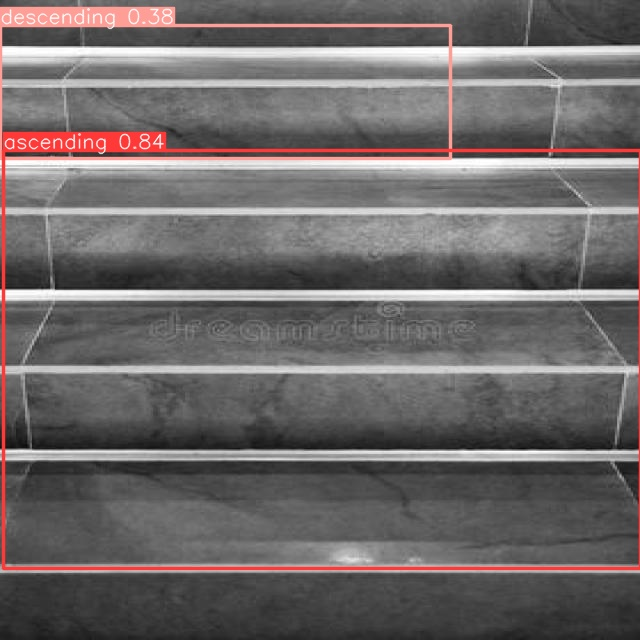

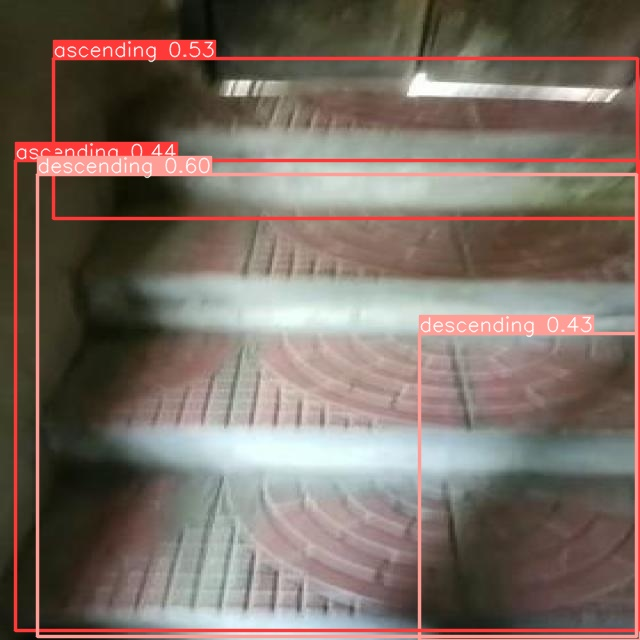

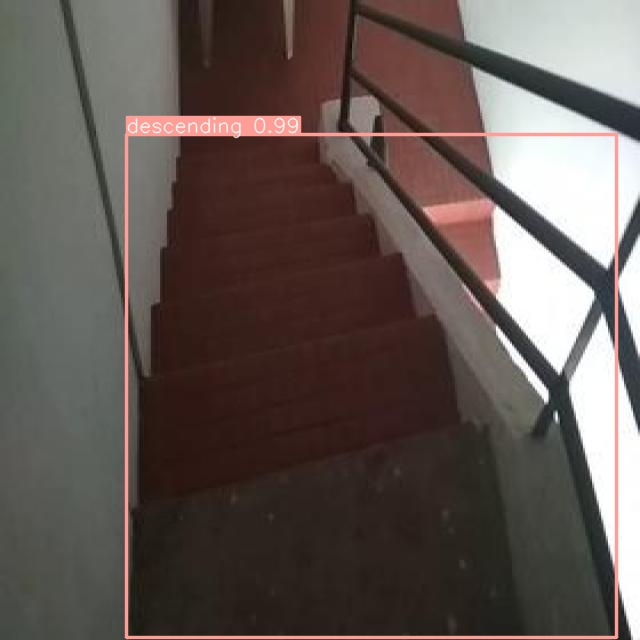

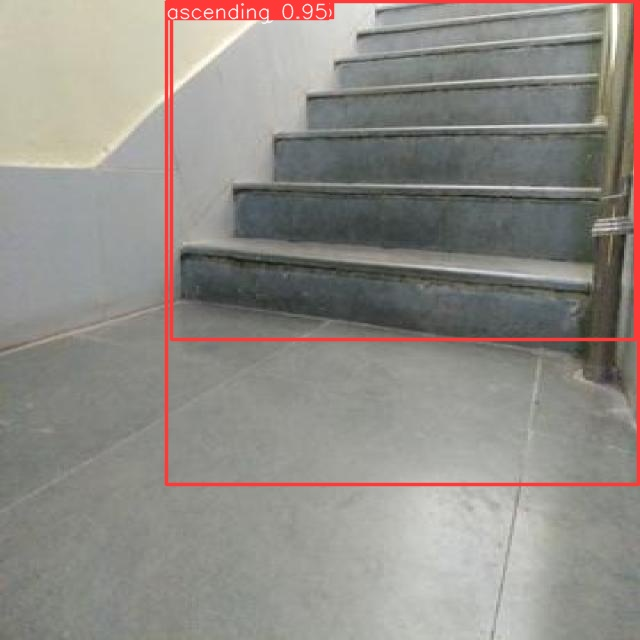

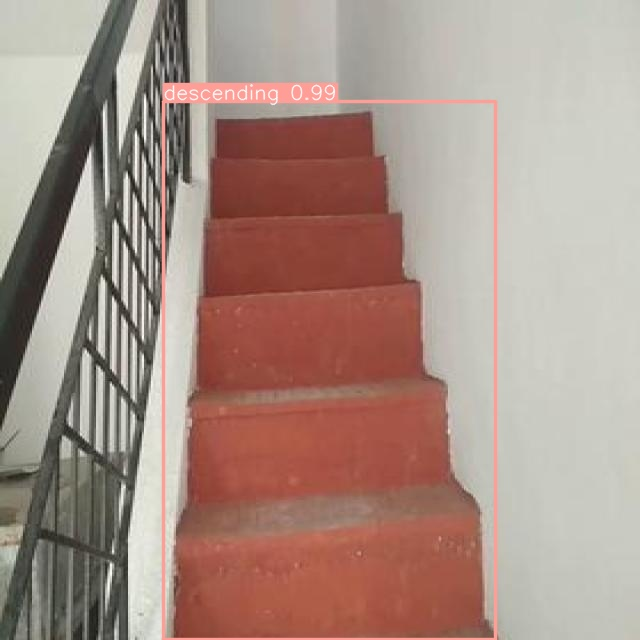

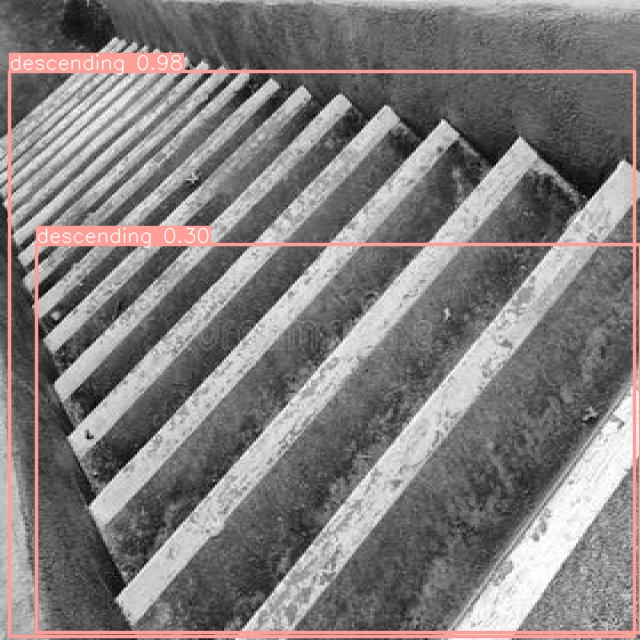

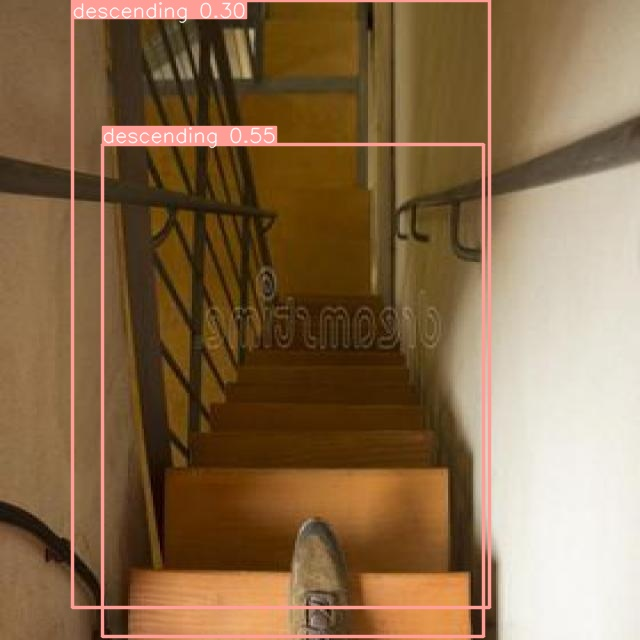

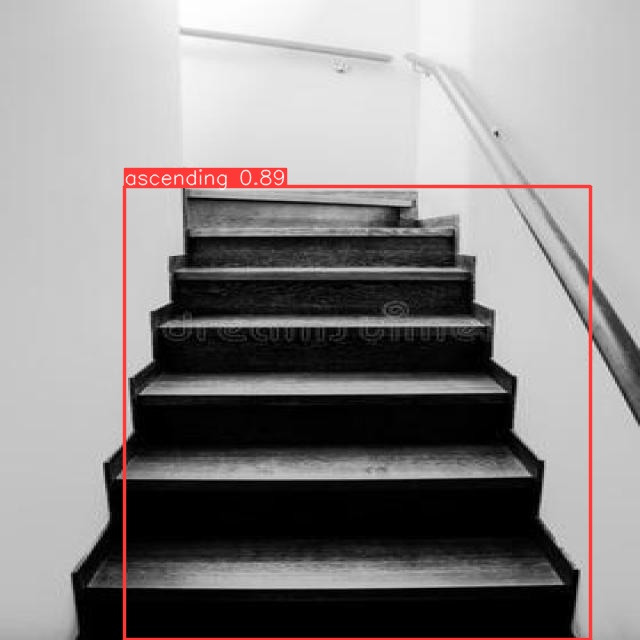

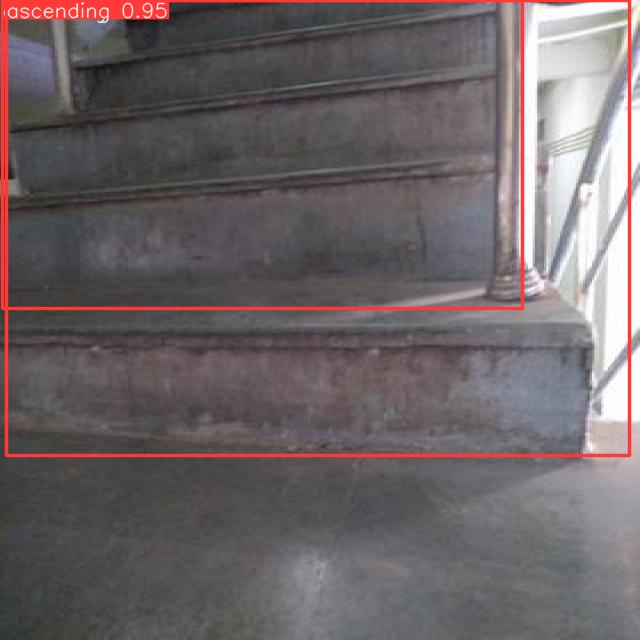

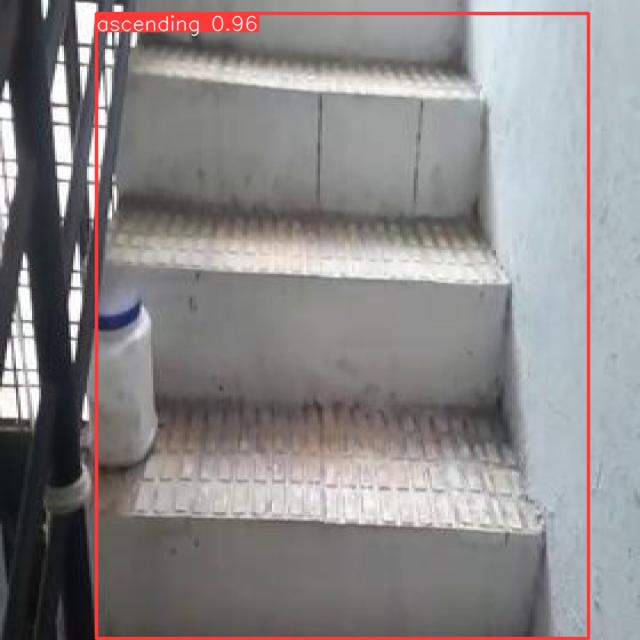

In [ ]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'/content/runs/detect/predict3/*.jpg'):
  display(Image(filename=image_path, height=600))
  print("\n")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/
!ls
!zip -r train4.zip .

/content
drive  runs  sample_data  stairs-1  yolov8m.pt	yolov8n.pt
  adding: .config/ (stored 0%)
  adding: .config/config_sentinel (stored 0%)
  adding: .config/logs/ (stored 0%)
  adding: .config/logs/2023.11.03/ (stored 0%)
  adding: .config/logs/2023.11.03/18.00.06.856125.log (deflated 58%)
  adding: .config/logs/2023.11.03/18.00.27.780630.log (deflated 58%)
  adding: .config/logs/2023.11.03/18.00.40.388891.log (deflated 56%)
  adding: .config/logs/2023.11.03/18.00.18.330056.log (deflated 86%)
  adding: .config/logs/2023.11.03/17.59.39.197392.log (deflated 91%)
  adding: .config/logs/2023.11.03/18.00.39.484927.log (deflated 57%)
  adding: .config/.last_opt_in_prompt.yaml (stored 0%)
  adding: .config/active_config (stored 0%)
  adding: .config/gce (stored 0%)
  adding: .config/configurations/ (stored 0%)
  adding: .config/configurations/config_default (deflated 15%)
  adding: .config/default_configs.db (deflated 98%)
  adding: .config/.last_update_check.json (deflated 22%)
  adding

In [ ]:
from google.colab import files
files.download('train4.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>